Il nomogramma di Fagan semplifica l'interpretazione delle Likelihood Ratios di un test, segno o sintomo, data la probabilità di malattia priori, indicando la risultante probabilità di malattia a posteriori <cite data-cite="franco2016rapporto"></cite> <cite data-cite="caraguel2013two"></cite> fornendo uno strumento grafico di facile utilizzo senza la necessità di effettuare calcoli.

Costruiamo passo per passo un nomogramma di Fagan con `matplotlib` in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, Markdown

Sappiamo che gli Odds a posteriori $\mathbf{O_{po}}$ dato il risultato di un test $\odot$ (o la presenza di un segno o di un sintomo) sono pari alla Likelihood Ratio $\mathbf{LR}$ del test (o del segno/sintomo) moltiplicato per gli Odds a priori $\mathbf{O_{pr}}$

$$
\mathbf{O_{po}} = \mathbf{LR} \cdot \mathbf{O_{pr}}
$$

La relazione tra Odds e Probabilità è $\mathbf{O} = P / (1 - P)$, possiamo dunque dire che

$$
\frac{\mathbf{Po}}{1 - \mathbf{Po}} = \mathbf{LR} \cdot \frac{\mathbf{Pr}}{1 - \mathbf{Pr}}
$$

dove $\mathbf{Po}$ è la probabilità di malattia a posteriori dato il risultato del test $\mathbf{Po} = P(M|\odot)$ e $\mathbf{Pr}$ è la probabilità di malattia a priori $\mathbf{Pr} = P(M)$

I tre termini di questa equazione rappresentano la base dei tre assi dei nomogramma di Fagan che lega probabilità a priori e a posteriori di malattia in base alla Likelihood Ratio. In particolare, volendo porre a sinistra nel nomogramma l'asse delle probabilità a priori, a destra l'asse delle probabilità a posteriori e al centro l'asse delle Likelhood Ratios, possiamo riscrivere

$$
\frac{\mathbf{Pr}}{1 - \mathbf{Pr}} = \frac{1}{\mathbf{LR}} \cdot \frac{\mathbf{Po}}{1 - \mathbf{Po}}
$$

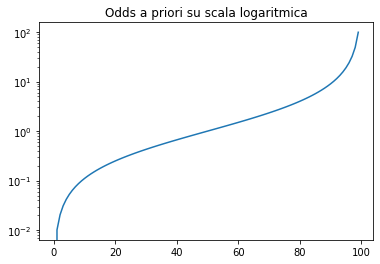

In [2]:
Pr = np.linspace(0, 1, 101)
Opr = Pr/(1-Pr)
clear_output()
plt.plot(Opr)
plt.yscale("log")
plt.title("Odds a priori su scala logaritmica");

Data la natura logaritmica degli Odds, useremo scale logaritmiche per tutti gli assi e dunque riscriviamo

$$
\log \left( \frac{\mathbf{Pr}}{1 - \mathbf{Pr}} \right) = 
\log \left( \frac{1}{\mathbf{LR}} \cdot \frac{\mathbf{Po}}{1 - \mathbf{Po}} \right)
$$

Impostiamo la base del nomogramma, ponendo i tre assi ad $x=\{-1, 0, 1\}$ e impostando come limite per l'asse y l'intero più vicino al logaritmo del massimo e del minimo Odd che vogliamo usare

$$
\mathbf{O}_{max} = \log \left( \frac{P_{max}}{1 - P_{max}} \right)
$$

$$
\mathbf{O}_{min} = \log \left( \frac{P_{min}}{1 - P_{min}} \right)
$$

dove sceglieremo $P_{max}=99.9\%=.999$ e $P_{min}=0.1\%=0.001$ dunque


$$
\mathbf{O}_{max} = 7.00
$$

$$
\mathbf{O}_{min} = -7.00
$$


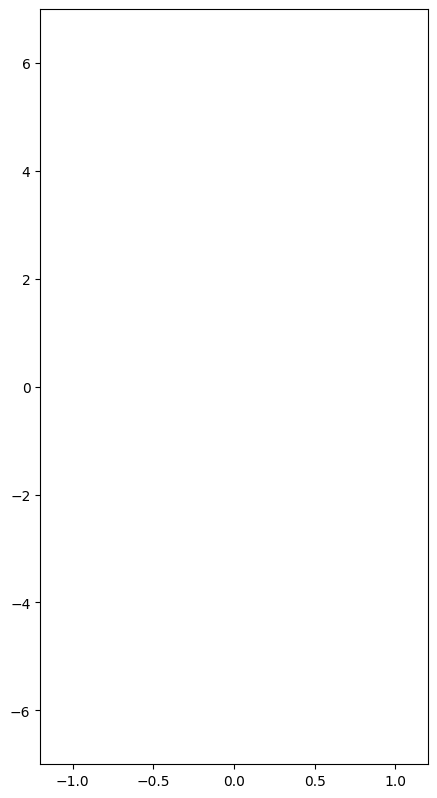

In [3]:
Pmax = .999
Pmin = .001
Omax = np.ceil(np.log(Pmax/(1-Pmax)))
Omin = np.floor(np.log(Pmin/(1-Pmin)))
display(Markdown(fr"""
$$
\mathbf{{O}}_{{max}} = {Omax:.2f}
$$

$$
\mathbf{{O}}_{{min}} = {Omin:.2f}
$$
"""))

fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)
plt.show();

Iniziamo a disegnare il primo asse del nomogramma delle $\mathbf{Pr}$ probabilità a priori, alle ascisse $x=-1$. I segni sull'asse corrisponderanno agli Odds mentre le etichette alle Probabilità.

Scegliamo un vettore di Probabilità per i segni/etichette maggiori che vogliamo visualizzare e calcoliamo i corrispondenti valori Odds, ad esempio:

In [4]:
Pticks = np.sort(np.concatenate([
    np.arange(.1, .999, .1),
    np.arange(.08, 0, -.02),
    np.arange(.01, 0, -.002),
    np.arange(.92, .999, +.02),
    np.arange(.99, .999, +.002),
    [.001, .999]
]))
print(f"Etichette Probabilità: {Pticks}")

Etichette Probabilità: [0.001 0.002 0.004 0.006 0.008 0.01  0.02  0.04  0.06  0.08  0.1   0.2
 0.3   0.4   0.5   0.6   0.7   0.8   0.9   0.92  0.94  0.96  0.98  0.99
 0.992 0.994 0.996 0.998 0.999]


In [5]:
Oticks = Pticks / (1 - Pticks)
print(f"Etichette Odds: {Oticks}")

Etichette Odds: [1.00100100e-03 2.00400802e-03 4.01606426e-03 6.03621730e-03
 8.06451613e-03 1.01010101e-02 2.04081633e-02 4.16666667e-02
 6.38297872e-02 8.69565217e-02 1.11111111e-01 2.50000000e-01
 4.28571429e-01 6.66666667e-01 1.00000000e+00 1.50000000e+00
 2.33333333e+00 4.00000000e+00 9.00000000e+00 1.15000000e+01
 1.56666667e+01 2.40000000e+01 4.90000000e+01 9.90000000e+01
 1.24000000e+02 1.65666667e+02 2.49000000e+02 4.99000000e+02
 9.99000000e+02]


e applichiamolo al primo asse, ricordando la relazione tra Odds e Probabilità e la scala logaritmica

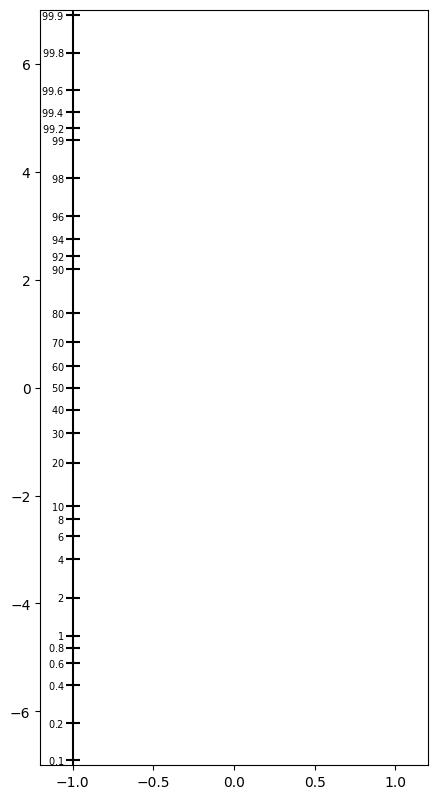

In [6]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )
plt.show();

Applichiamo il medesimo ragionamento per l'asse destro delle probabilità a posteriori, ma invertendone i valori.

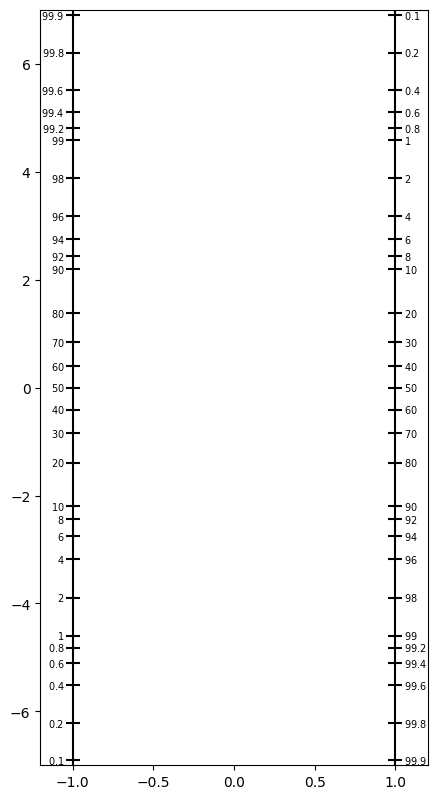

In [7]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )
plt.show();

Occupiamoci ora dell'asse centrale delle Likelihood Ratios, scegliendo alcuni valori notevoli per i segni maggiori da mostrare. Ad esempio, le potenze di 10 da -3 a 3.

In [8]:
Lticks = [10 ** int(i) for i in np.arange(-3, 3.1, 1)]
print(f"Etichette Likelihood Ratios: {Lticks}")

Etichette Likelihood Ratios: [0.001, 0.01, 0.1, 1, 10, 100, 1000]


Per posizionare i segni notiamo che i valori a priori e a posteriori sono complementari lungo l'asse $x$ (avevamo infatto invertito l'asse destro)

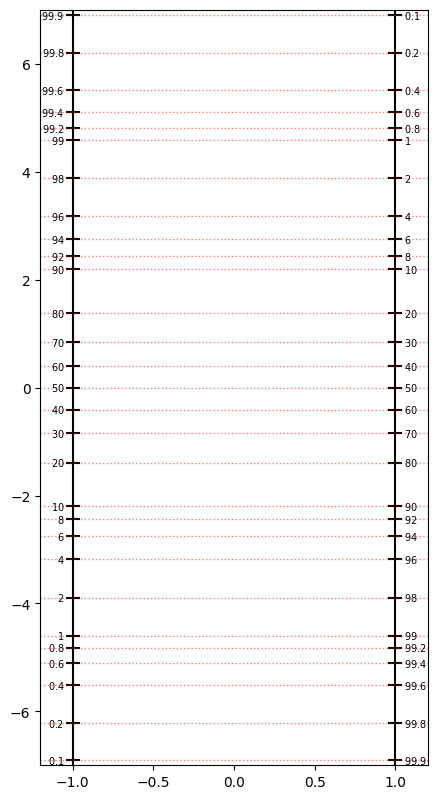

In [9]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

# Valori complementari esempio
for Otick in Oticks:
    ax.axhline(np.log(Otick), c="r", ls=":", alpha=.5, lw=1)

plt.show();

Pertanto è sufficiente risolvere l'equazione

$$
\frac{1 - \mathbf{Pr}}{\mathbf{Pr}} = \mathbf{LR} \cdot \frac{\mathbf{Pr}}{1 - \mathbf{Pr}}
$$

da cui otteniamo

$$
\mathbf{Pr} = \frac{1}{1 + \sqrt{\mathbf{LR}}}
$$

e calcolare poi i corrispondenti Odds per ottenere il valore della coordinata sull'asse $y$ del contenitore

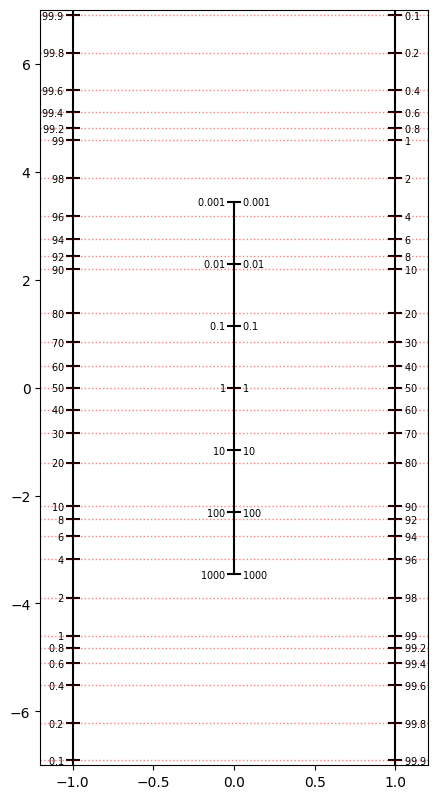

In [10]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

Ops = []
for Ltick in Lticks:
    Op = 1 / (np.sqrt(Ltick) + 1)
    Ops.append(Op)
    ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
    ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
    ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")
    
# Valori complementari esempio
for Otick in Oticks:
    ax.axhline(np.log(Otick), c="r", ls=":", alpha=.5, lw=1)

plt.show();

Possiamo ora aggiungere dei segni minori sull'asse di $\mathbf{LR}$ e rimuovere le linee verticali dei valori complementari

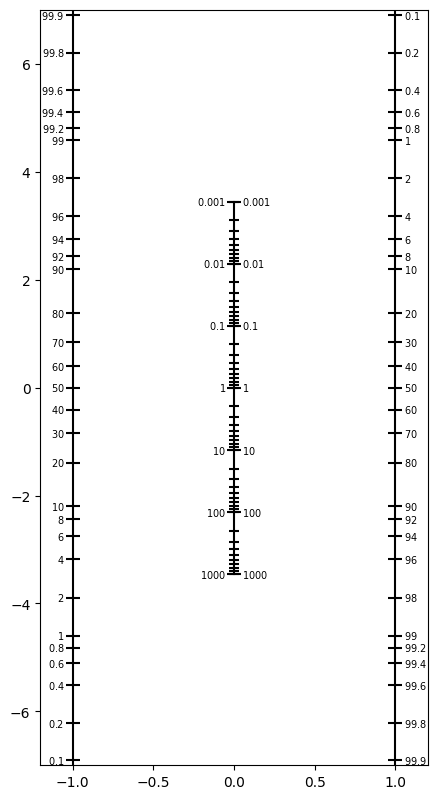

In [11]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

Ops = []
for Ltick in Lticks:
    Op = 1 / (np.sqrt(Ltick) + 1)
    Ops.append(Op)
    ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
    ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
    ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
    minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
    for minor in minors:
        if minor < .001:
            continue
        Op = 1 / (np.sqrt(minor) + 1)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

plt.show();

Gli assi del nomogramma sono completi, rimuoviamo i valori di ascisse e coordinate del contenitore, aggiungiamo titolo ed etichette degli assi del nomogramma

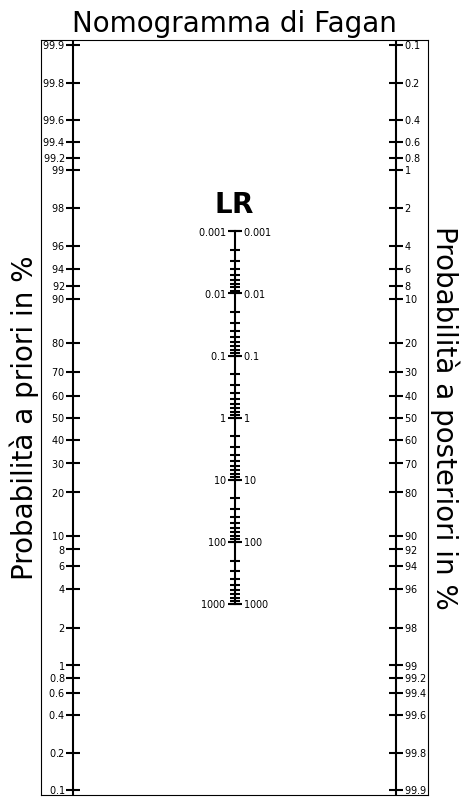

In [12]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(Omin, Omax)

ax.axvline(-1, c="k")
ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        -1.05, np.log(Otick),
        f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
        fontsize=7, va="center", ha="right"
    )

ax.axvline(+1, c="k")
ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
for Otick, Ptick in zip(Oticks, Pticks):
    ax.text(
        +1.05, np.log(Otick),
        f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
        fontsize=7, va="center", ha="left"
    )

Ops = []
for Ltick in Lticks:
    Op = 1 / (np.sqrt(Ltick) + 1)
    Ops.append(Op)
    ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
    ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
    ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
    minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
    for minor in minors:
        if minor < .001:
            continue
        Op = 1 / (np.sqrt(minor) + 1)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Nomogramma di Fagan", fontsize=20)
ax.text(-1.3, 0, "Probabilità a priori in %", ha="center", va="center", fontsize=20, rotation=90)
ax.text(+1.3, 0, "Probabilità a posteriori in %", ha="center", va="center", fontsize=20, rotation=270)
ax.text(0, np.log(Ops[0]/(1-Ops[0]))+.5, "$\mathbf{LR}$", ha="center", va="center", fontsize=20)

plt.show();

Possiamo ora testarlo per alcuni valori di Probabilità a priori e Likelihood Ratio, ricordando che i valori a priori e posteriori sono complementari sui due assi dunque la funzione per determinare la coordinata $y$ della Probabilità a posteriori sarà

$$
\log \left(
    \frac{\mathbf{Pr}}{1-\mathbf{Pr}}
    \right)
=
\log \left(
    \frac{1}{\mathbf{LR}} \cdot \frac{1-\mathbf{Po}}{\mathbf{Po}}
    \right)
$$

In [13]:
def Fagan(draw=[]):
    fig, ax = plt.subplots(figsize=(5,10), dpi=100)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(Omin, Omax)

    ax.axvline(-1, c="k")
    ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=100)
    for Otick, Ptick in zip(Oticks, Pticks):
        ax.text(
            -1.05, np.log(Otick),
            f"${Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${Ptick:.1%}$",
            fontsize=7, va="center", ha="right"
        )

    ax.axvline(+1, c="k")
    ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=100)
    for Otick, Ptick in zip(Oticks, Pticks):
        ax.text(
            +1.05, np.log(Otick),
            f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
            fontsize=7, va="center", ha="left"
        )

    Ops = []
    for Ltick in Lticks:
        Op = 1 / (np.sqrt(Ltick) + 1)
        Ops.append(Op)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=100)
        ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="left")
        ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=7, c="k", va="center", ha="right")
        minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
        for minor in minors:
            if minor < .001:
                continue
            Op = 1 / (np.sqrt(minor) + 1)
            ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
    ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Nomogramma di Fagan", fontsize=20)
    ax.text(-1.3, 0, "Probabilità a priori in %", ha="center", va="center", fontsize=20, rotation=90)
    ax.text(+1.3, 0, "Probabilità a posteriori in %", ha="center", va="center", fontsize=20, rotation=270)
    ax.text(0, np.log(Ops[0]/(1-Ops[0]))+.5, "$\mathbf{LR}$", ha="center", va="center", fontsize=20)
    
    for line in draw:
        Opo = line[1] * (line[0]/(1-line[0]))
        Ppo = Opo/(1+Opo)
        print(f"Pr:{line[0]:>7.2%}  LR:{line[1]:>7.2f}  Po:{Ppo:>7.2%}")
        ax.plot(
            [-1, 1], [np.log(line[0]/(1-line[0])), np.log((1-line[0])/(line[0]*line[1]))]
        )

    plt.show();

Pr:  2.00%  LR: 100.00  Po: 67.11%
Pr: 99.00%  LR:  10.00  Po: 99.90%
Pr: 30.00%  LR:   0.02  Po:  0.85%


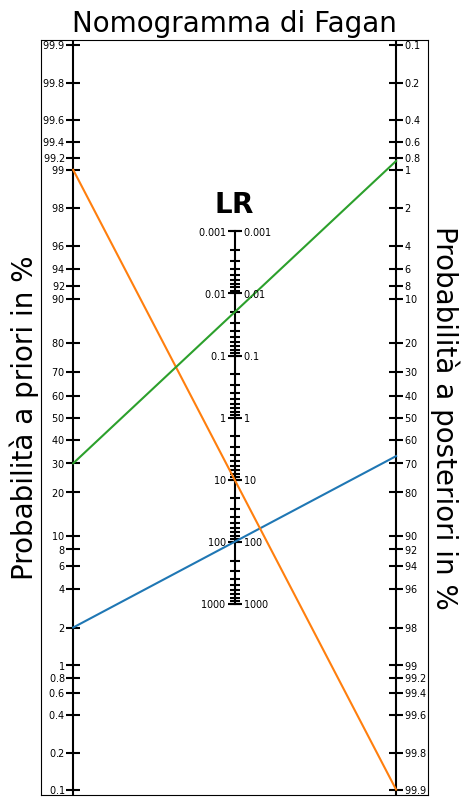

In [14]:
Fagan(
    draw=[
        [.02, 100],
        [.99, 10],
        [.3, .02]
    ]
)

Il nomogramma è completo e corretto.

Estendiamo ora il nomogramma aggiungendo due nuovi assi: l'asse della sensibilità $\mathbf{SE}$ e l'asse della specificità $\mathbf{SP}$.

Ricordiamo che si distiguono due Likelihood Ratios per i test qualitativi: la Likelihood Ratios per risultato positivo $\mathbf{LR}(\oplus)$ e la Likelihood Ratio per risultato negativo $\mathbf{LR}(\ominus)$

$$
\mathbf{LR}(\oplus) = \frac{\mathbf{SE}}{1 - \mathbf{SP}}
$$

$$
\mathbf{LR}(\ominus) = \frac{1 - \mathbf{SE}}{\mathbf{SP}}
$$

da cui ricaviamo che $\mathbf{LR}$ è un semplice coefficiente angolare tra due variabili complementari. Essendo $\mathbf{LR}$ su scala logaritmica, la useremo anche per gli assi di specificità e sensibilità. Riscriviamo le equazioni in modo da enfatizzare il ruolo di $\mathbf{LR}$ come coefficiente angolare

$$
\mathbf{SE} = \mathbf{LR}(\oplus) \cdot (1 - \mathbf{SP})
$$

$$
1 - \mathbf{SE} = \mathbf{LR}(\ominus) \cdot (\mathbf{SP})
$$

Notiamo come i termini del medesimo asse siano complementari tra loro: questo comporta il grosso vantaggio che non dovremo disegnare 4 assi differenti ma solo i due assi di $\mathbf{SE}$ ed $\mathbf{SP}$ con etichette complementari ad ogni segno: una per $\mathbf{LR}(\oplus)$ e una per $\mathbf{LR}(\ominus)$.

Per ottenere dunque $\mathbf{LR}(\oplus)$ date sensibilità e specificità, sarà sufficiente "tracciare una linea" dall'etichetta sull'asse della sensibilità corrispondente sul lato $(\oplus)$ all'etichetta della specificità nota sull'asse opposto dal lato $(\oplus)$: l'intercetta con l'asse di $\mathbf{LR}$ sarà il valore risultante cercato.

Possiamo però estendere ulteriormente questo concetto, includendo la ripetizione del test con **regola OR** e con **regola AND**.

In [353]:
def Fagan2(data=None, rule=None):
    
    Pmax = .999
    Pmin = .001
    Omax = np.ceil(np.log(Pmax/(1-Pmax)))
    Omin = np.floor(np.log(Pmin/(1-Pmin)))
    
    Pticks = np.sort(np.concatenate([
        np.arange(.1, .999, .1),
        np.arange(.08, 0, -.02),
        np.arange(.01, 0, -.002),
        np.arange(.92, .999, +.02),
        np.arange(.99, .999, +.002),
        [.001, .999],
        [.85, .15], [.03, .015], [.97, .985],
        [.003, .997]
    ]))
    Oticks = Pticks / (1 - Pticks)
    Pminors = np.concatenate([
        np.arange(.2, .985, .05),
        [.125, .175, .09, .07, .05, .035, .025, .0125, .0175, .009, .007, .005, .0035, .0025, .0015],
        [.825, .875, .91, .93, .95, .965, .975, .9825, .9875, .991, .993, .995, .9965, .9975, .9985]
    ])

    fig, ax = plt.subplots(figsize=(12,12), dpi=250)
    ax.set_xlim(-1.15, 1.15)
    ax.set_ylim(Omin-.05, Omax+.05)

    ax.axvline(-1, c="k")
    ax.scatter([-1 for _ in range(len(Pticks))], np.log(Oticks), marker="_", c="k", s=300)
    for Otick, Ptick in zip(Oticks, Pticks):
        ax.text(
            -1.05, np.log(Otick),
            f"${Ptick:.0%}$" if Ptick<=.98 and Ptick>=.02 else f"${Ptick:.1%}$",
            fontsize=10, va="center", ha="right"
        )
    ax.scatter([-1 for _ in range(len(Pminors))], np.log(Pminors/(1-Pminors)), marker="_", c="k", s=75)

    ax.axvline(+1, c="k")
    ax.scatter([+1 for _ in range(len(Pticks))], np.log(1/Oticks), marker="_", c="k", s=300)
    for Otick, Ptick in zip(Oticks, Pticks):
        ax.text(
            +1.05, np.log(Otick),
            f"${1-Ptick:.0%}$" if Ptick<=.99 and Ptick>=.01 else f"${1-Ptick:.1%}$",
            fontsize=10, va="center", ha="left"
        )
    ax.scatter([+1 for _ in range(len(Pminors))], np.log(1/(Pminors/(1-Pminors))), marker="_", c="k", s=75)

    Ops = []
    for Ltick in Lticks:
        Op = 1 / (np.sqrt(Ltick) + 1)
        Ops.append(Op)
        ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=200)
        ax.text(+.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=10, c="k", va="center", ha="left")
        ax.text(-.05, np.log(Op/(1-Op)), f"${Ltick}$", fontsize=10, c="k", va="center", ha="right")
        minors = [Ltick-10**int(np.log10(Ltick)-1)*i for i in range(9)]
        for minor in minors:
            if minor < .001:
                continue
            Op = 1 / (np.sqrt(minor) + 1)
            ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k", s=50)
    ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], c="k", ls="-")

    SEmin = np.log(Ops[0]/(1-Ops[0]))
    SEmax = np.log(Ops[-1]/(1-Ops[-1]))

    SEticks = np.sort(
        np.concatenate([
            np.arange(0, 1, .1)[1:],
            np.arange(0, .1, .01)[1:],
            np.arange(0, .01, .001)[1:],
            [.999],
            [.00115, .0013, .0015, .0017],
            [.0023, .0026],
            [.0115, .013, .015, .017],
            [.023, .026],
            [.115, .13, .15, .17],
            [.23, .26],
            [.0035, .035, .35],
            [.0045, .045, .45]
        ])
    )
    ax.plot([-.5,-.5], [SEmin, SEmax], c="k", ls="-")
    for SEtick in SEticks:
        ax.scatter(-.5, SEmax-np.log(SEtick), marker="_", c="k", s=75)
        ax.text(-.525, SEmax-np.log(SEtick), f"${SEtick*100:.2f}$", fontsize=5, va="center", ha="right", c="k")
        ax.text(-.475, SEmax-np.log(SEtick), f"${100-SEtick*100:.2f}$", fontsize=5, va="center", ha="left", c="k")
        # 2nd OR
        ax.text(-.610, SEmax-np.log(SEtick), f"${(1-np.sqrt(1-SEtick))*100:.2f}$", fontsize=5, va="center", ha="right", c="k")
        ax.text(-.390, SEmax-np.log(SEtick), f"${(1-np.sqrt(1-(1-SEtick)))*100:.2f}$", fontsize=5, va="center", ha="left", c="k")
        # 2nd AND
        ax.text(-.690, SEmax-np.log(SEtick), f"${np.sqrt(SEtick)*100:.2f}$", fontsize=5, va="center", ha="right", c="k")
        ax.text(-.310, SEmax-np.log(SEtick), f"${np.sqrt(1-SEtick)*100:.2f}$", fontsize=5, va="center", ha="left", c="k")

    ax.plot([.5,.5], [SEmin, SEmax], c="k", ls="-")
    for SEtick in SEticks:
        ax.scatter(.5, SEmin+np.log(SEtick), marker="_", c="k", s=75)
        ax.text(.525, SEmin+np.log(SEtick), f"${SEtick*100:.2f}$", fontsize=5, va="center", ha="left", c="k")
        ax.text(.475, SEmin+np.log(SEtick), f"${100-SEtick*100:.2f}$", fontsize=5, va="center", ha="right", c="k")
        # 2nd OR
        ax.text(.610, SEmin+np.log(SEtick), f"${np.sqrt(SEtick)*100:.2f}$", fontsize=5, va="center", ha="left", c="k")
        ax.text(.390, SEmin+np.log(SEtick), f"${np.sqrt(1-SEtick)*100:.2f}$", fontsize=5, va="center", ha="right", c="k")
        # 2nd AND
        ax.text(.690, SEmin+np.log(SEtick), f"${(1-np.sqrt(1-SEtick))*100:.2f}$", fontsize=5, va="center", ha="left", c="k")
        ax.text(.310, SEmin+np.log(SEtick), f"${(1-np.sqrt(1-(1-SEtick)))*100:.2f}$", fontsize=5, va="center", ha="right", c="k")

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Fagan's Nomogram", fontsize=20)
    ax.text(-1.2, 0, "Prior Disease Probability %", ha="center", va="center", fontsize=20, rotation=90)
    ax.text(+1.2, 0, "Posterior Disease Probability %", ha="center", va="center", fontsize=20, rotation=270)
    ax.text(0, SEmin+.5, "$\mathbf{LR}$", ha="center", va="center", fontsize=20)
    ax.text(-.5, SEmin+.5, "SENSITIVITY", ha="center", va="center", fontsize=20)

    ax.text(-.525, SEmin+.2, "$\oplus$", ha="right", va="center", fontsize=12, color="k")
    ax.text(-.600, SEmin+.2, r"OR", ha="right", va="center", fontsize=10, color="k")
    ax.text(-.680, SEmin+.2, r"AND", ha="right", va="center", fontsize=10, color="k")
    ax.text(-.475, SEmin+.2, "$\ominus$", ha="left", va="center", fontsize=12, color="k")
    ax.text(-.400, SEmin+.2, r"OR", ha="left", va="center", fontsize=10, color="k")
    ax.text(-.320, SEmin+.2, r"AND", ha="left", va="center", fontsize=10, color="k")

    ax.text(+.5, SEmin+.5, "SPECIFICITY", ha="center", va="center", fontsize=20)
    ax.text(+.475, SEmin+.2, "$\oplus$", ha="right", va="center", fontsize=12, color="k")
    ax.text(+.400, SEmin+.2, r"OR", ha="right", va="center", fontsize=10, color="k")
    ax.text(+.320, SEmin+.2, r"AND", ha="right", va="center", fontsize=10, color="k")
    ax.text(+.525, SEmin+.2, "$\ominus$", ha="left", va="center", fontsize=12, color="k")
    ax.text(+.600, SEmin+.2, r"OR", ha="left", va="center", fontsize=10, color="k")
    ax.text(+.680, SEmin+.2, r"AND", ha="left", va="center", fontsize=10, color="k")

    ax.text(0, Omin, "Coded by Max Pierini - 2020", ha="center")
    
    # draw data
    data = np.array(data)
    data[data<=0] = 1e-3
    data[data>=1] = 1 - 1e-3
    PR = data[0]
    SE = data[1]
    SP = data[2]

    # SE,SP->LR
    ax.plot(
        [-.5, .5],
        [SEmax-np.log(SE), SEmin+np.log(1-SP)],
        c="b", alpha=.25, ls="-"
    )
    ax.plot(
        [-.5, .5],
        [SEmax-np.log(1-SE), SEmin+np.log(SP)],
        c="b", alpha=.25, ls="--"
    )
    LRp = SE / (1 - SP)
    OPp = LRp * (PR/(1-PR))
    PPp = OPp/(1+OPp)
    # Pr,LR->Po
    ax.plot(
        [-1, 1], [np.log(PR/(1-PR)), np.log((1-PR)/(PR*LRp))],
        c="b", alpha=.5, ls="-"
    )
    LRn = (1 - SE) / SP
    OPn = LRn * (PR/(1-PR))
    PPn = OPn/(1+OPn)
    ax.plot(
        [-1, 1], [np.log(PR/(1-PR)), np.log((1-PR)/(PR*LRn))],
        c="b", alpha=.5, ls="--"
    )

    print(f"""
    Pr:{PR:>7.2%}  
    SE1:{SE:>7.2%} SP1:{SP:>7.2%}  
    LR(+):{LRp:>7.2f}  Pp(+):{PPp:>7.2%}
    LR(-):{LRn:>7.2f}  Pp(-):{PPn:>7.2%}
    """)

    if rule:
        if rule == "OR":
            ax.plot([-1, 1], [np.log(PPn/(1-PPn)), np.log((1-PPn)/(PPn*1))], c="k", alpha=.25, ls=":")
            # regola OR #
            vSE = 1 - (1 - SE) ** 2
            vSP = SP ** 2
            # SE,SP->LR
            ax.plot(
                [-.5, .5],
                [SEmax-np.log(vSE), SEmin+np.log(1-vSP)],
                c="r", alpha=.25, ls="-"
            )
            ax.plot(
                [-.5, .5],
                [SEmax-np.log(1-vSE), SEmin+np.log(vSP)],
                c="r", alpha=.25, ls="--"
            )
            # Pr,LR->Po
            vLRp = vSE / (1 - vSP)
            vOPp = vLRp * (PPn/(1-PPn))
            vPPp = vOPp/(1+vOPp)
            # SE,SP->LR
            ax.plot(
                [-1, 1], [np.log(PPn/(1-PPn)), np.log((1-PPn)/(PPn*vLRp))],
                c="r", alpha=.5, ls="-"
            )
            # Pr,LR->Po
            vLRn = (1 - vSE) / vSP
            vOPn = vLRn * (PPn/(1-PPn))
            vPPn = vOPn/(1+vOPn)
            ax.plot(
                [-1, 1], [np.log(PPn/(1-PPn)), np.log((1-PPn)/(PPn*vLRn))],
                c="r", alpha=.5, ls="--"
            )
            print(f"""
            # regola OR #
            SE2:{vSE:>7.2%} SP2:{vSP:>7.2%}  
            LR(+):{vLRp:>7.2f}  Pp(+):{vPPp:>7.2%}
            LR(-):{vLRn:>7.2f}  Pp(-):{vPPn:>7.2%}
            """)

        if rule == "AND":
            ax.plot([-1, 1], [np.log(PPp/(1-PPp)), np.log((1-PPp)/(PPp*1))], c="k", alpha=.25, ls=":")
            # regola AND #
            aSE = SE ** 2
            aSP = 1 - (1 - SP) ** 2
            # SE,SP->LR
            ax.plot(
                [-.5, .5],
                [SEmax-np.log(aSE), SEmin+np.log(1-aSP)],
                c="y", alpha=.25, ls="-"
            )
            ax.plot(
                [-.5, .5],
                [SEmax-np.log(1-aSE), SEmin+np.log(aSP)],
                c="y", alpha=.25, ls="--"
            )
            # Pr,LR->Po
            aLRp = aSE / (1 - aSP)
            aOPp = aLRp * (PPp/(1-PPp))
            aPPp = aOPp/(1+aOPp)
            # SE,SP->LR
            ax.plot(
                [-1, 1], [np.log(PPp/(1-PPp)), np.log((1-PPp)/(PPp*aLRp))],
                c="y", alpha=.5, ls="-"
            )
            # Pr,LR->Po
            aLRn = (1 - aSE) / aSP
            aOPn = aLRn * (PPp/(1-PPp))
            aPPn = aOPn/(1+aOPn)
            ax.plot(
                [-1, 1], [np.log(PPp/(1-PPp)), np.log((1-PPp)/(PPp*aLRn))],
                c="y", alpha=.5, ls="--"
            )
            print(f"""
            # regola AND #
            SE2:{aSE:>7.2%} SP2:{aSP:>7.2%}  
            LR(+):{aLRp:>7.2f}  Pp(+):{aPPp:>7.2%}
            LR(-):{aLRn:>7.2f}  Pp(-):{aPPn:>7.2%}
            """)

    plt.show();


    Pr: 90.00%  
    SE1: 75.00% SP1: 95.00%  
    LR(+):  15.00  Pp(+): 99.26%
    LR(-):   0.26  Pp(-): 70.31%
    

            # regola OR #
            SE2: 93.75% SP2: 90.25%  
            LR(+):   9.62  Pp(+): 95.79%
            LR(-):   0.07  Pp(-): 14.09%
            


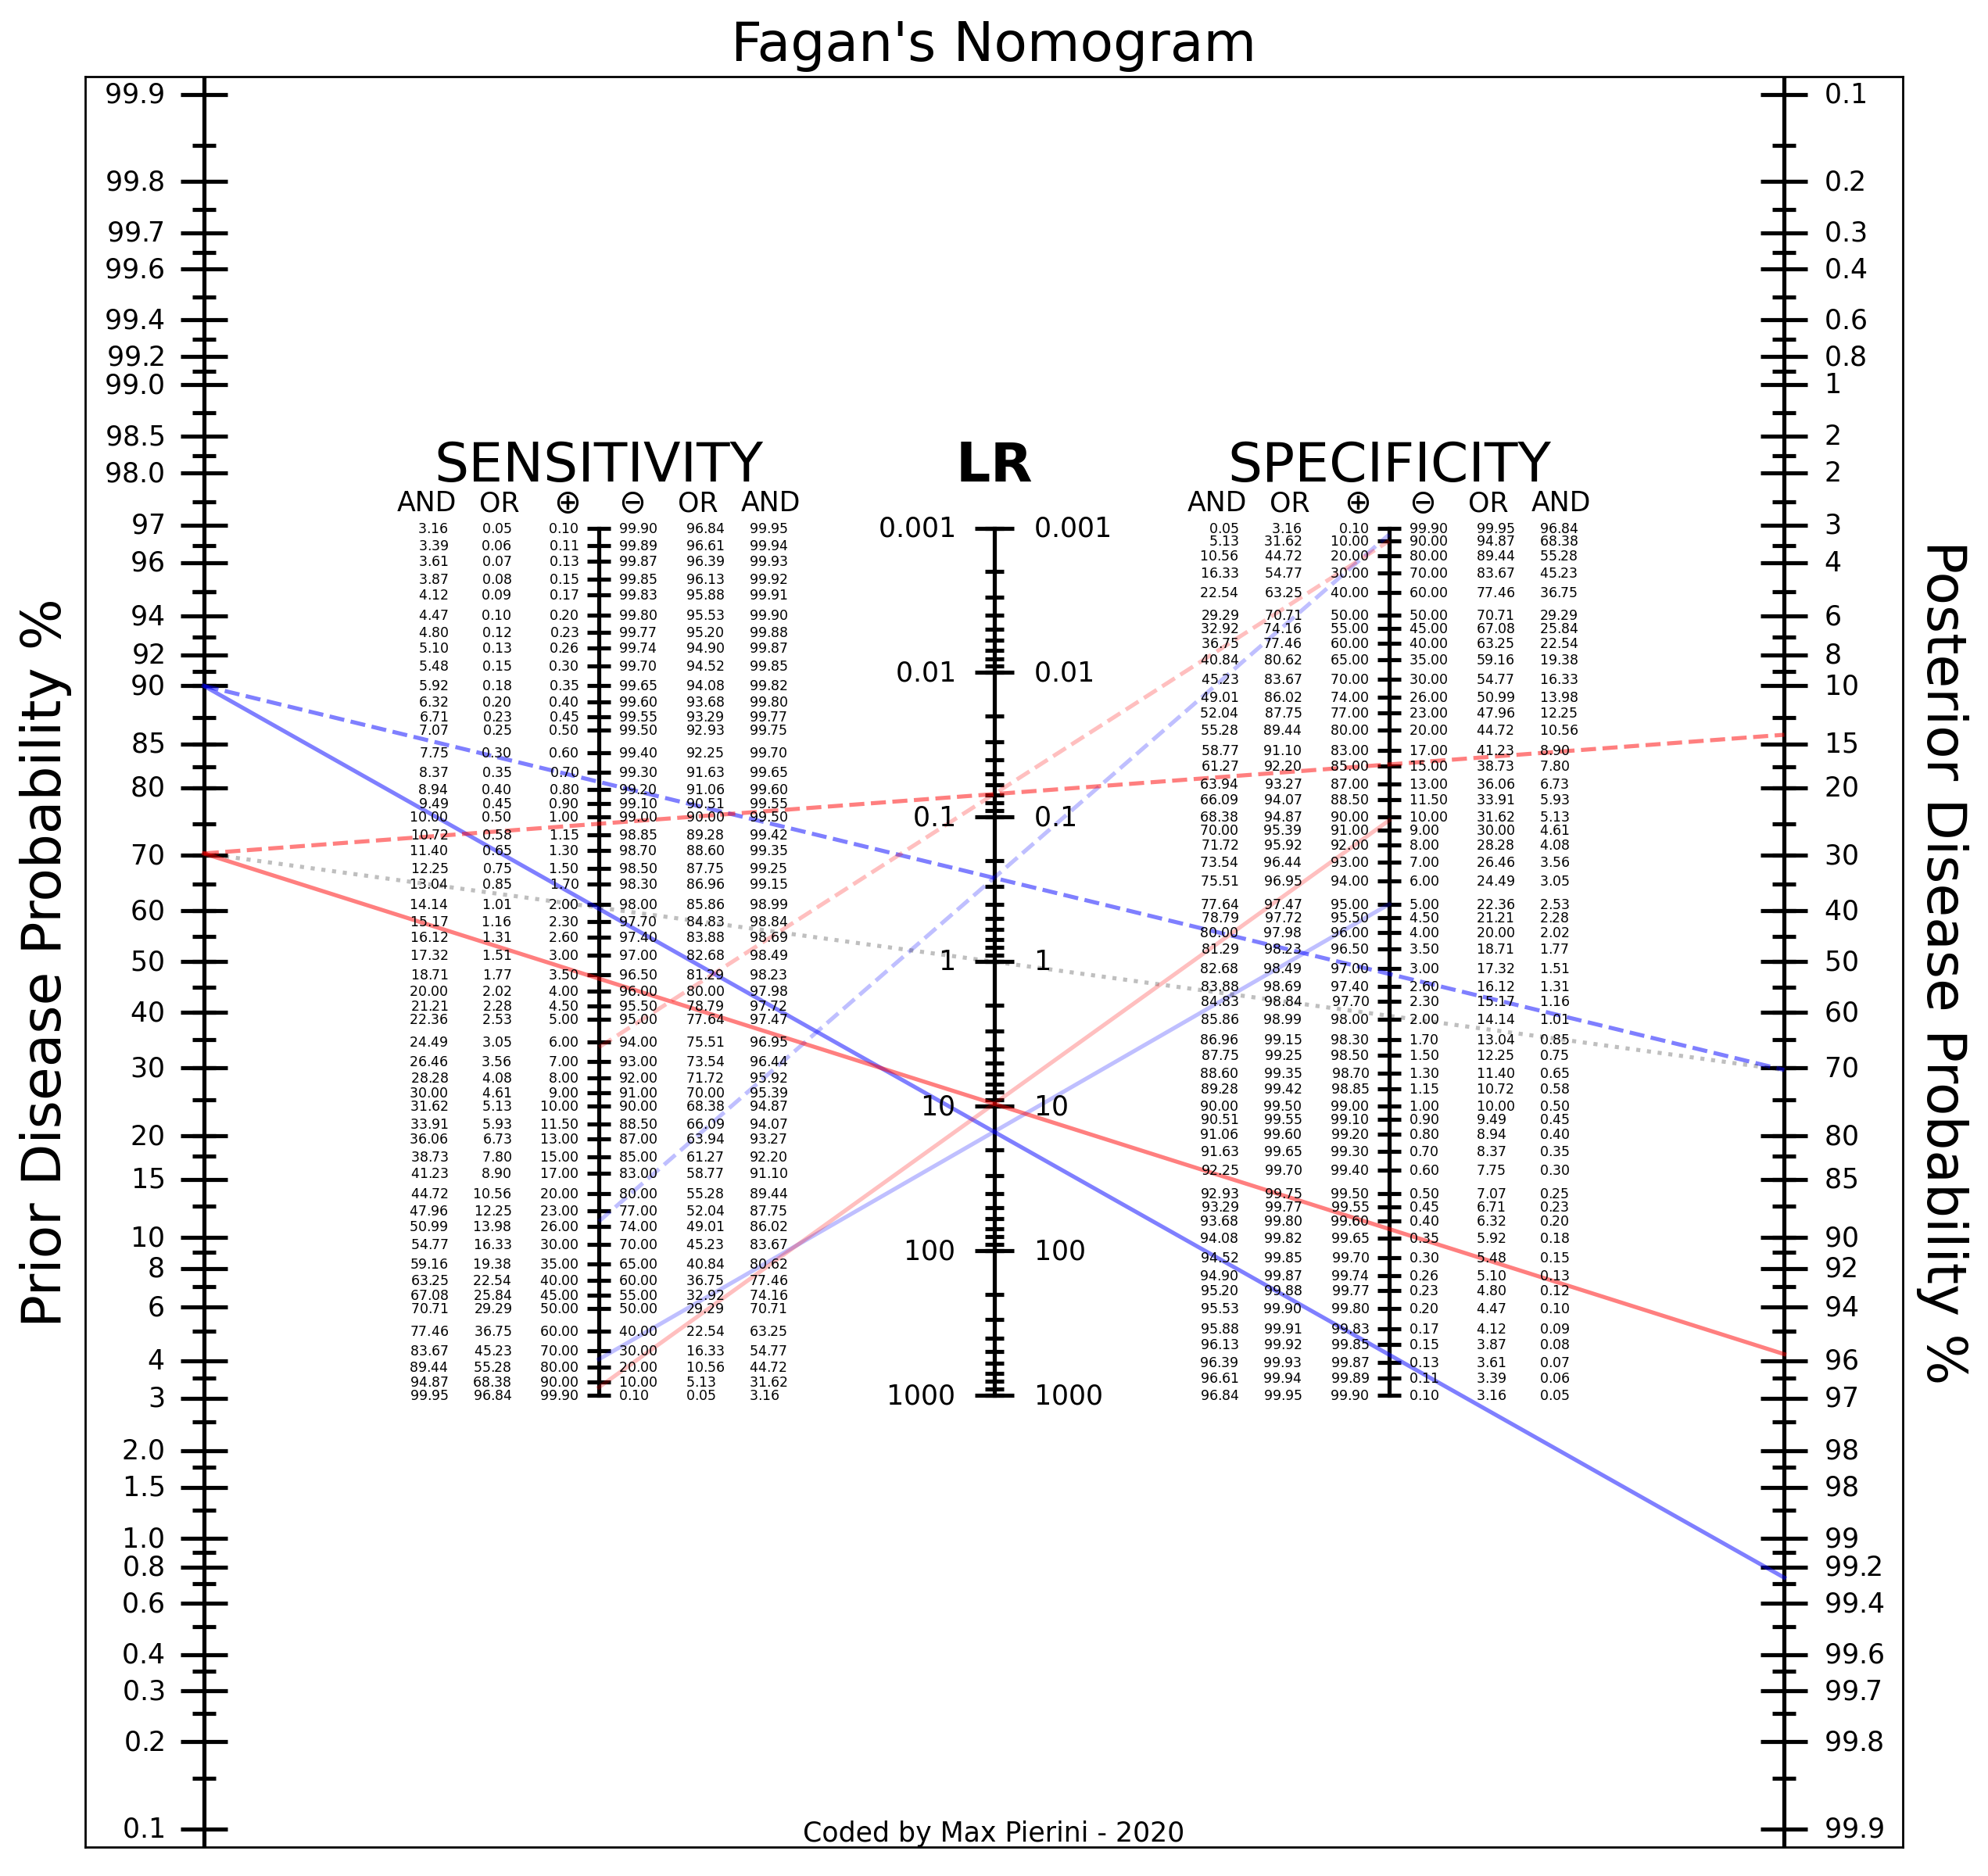

In [354]:
Fagan2(data=[.90, .75, .95], rule="OR")